# Creating a Dataset

Goal:
- Define the Characteristics of the Datset
- Specify the sampling strategy
- Save train, test and validate seperately



In [1]:
import numpy as np
from src.visualization.visualize import InputOutputVisualization
from src.data.make_dataset import make_mixed_dataset
from src.data.synthetic_dataset import SyntheticDataset
from src.data.sampling_strategy import DefaultSamplingStrategy

## Define the characteristics of the new dataset

In [2]:
sequence_length = 128
sigma = 0
sampling_strategy = DefaultSamplingStrategy(sequence_length=sequence_length,
                                            sigma=sigma)
sampling_strategy.mean_sampler.mean_value = 0
sample_sizes = [10000, 3000, 5000]

## Generate datasets

In [3]:
datasets = []
for name, sample_size in zip(["train.pkl", "validate.pkl", "test.pkl"], sample_sizes):
    dataset = make_mixed_dataset(
        sequence_length=sequence_length,
        sample_size=sample_size,
        sampling_strategy=sampling_strategy,
        frequencies=[1 / 8, 1 / 32],
        delays=[0, 32]
    )
    #dataset.shuffle()
    dataset.save(path_dir="", filename=name)
    datasets.append(dataset)

2021-07-30 14:08:52,717 - src.data - INFO - Shuffling dataset
2021-07-30 14:08:52,724 - src.data - INFO - Saving dataset to len_128_strat_default_sig_0_train.pkl
2021-07-30 14:08:52,745 - src.data - INFO - Shuffling dataset
2021-07-30 14:08:52,747 - src.data - INFO - Saving dataset to len_128_strat_default_sig_0_validate.pkl
2021-07-30 14:08:52,774 - src.data - INFO - Shuffling dataset
2021-07-30 14:08:52,778 - src.data - INFO - Saving dataset to len_128_strat_default_sig_0_test.pkl


# Example

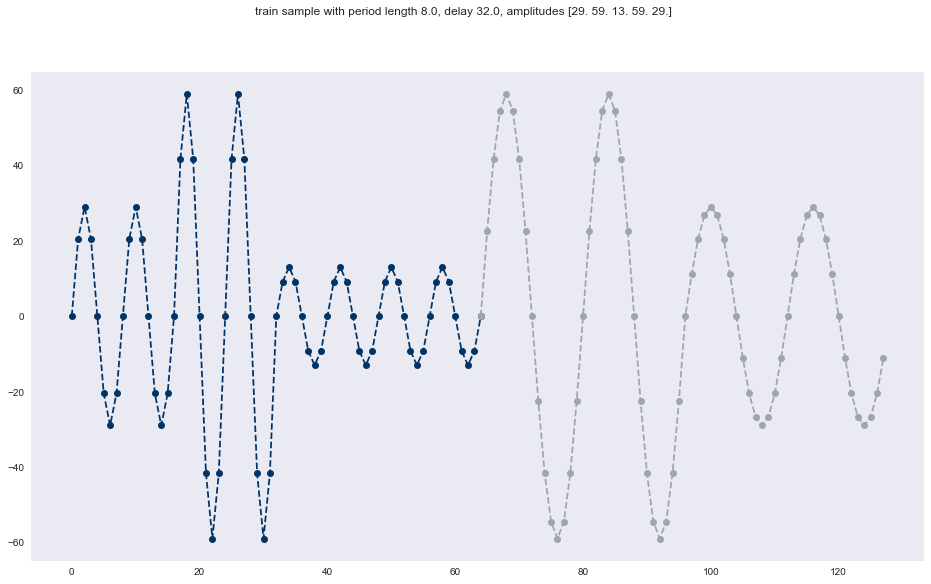

In [6]:
sample_num = np.random.randint(0, len(datasets[0]))
input_, output_ = datasets[0][sample_num]
viz = InputOutputVisualization(use_latex_font=False)
viz.quick_plot(np.concatenate((input_, output_))[:,0], pred_start=sequence_length//2, title=f"train sample with period length {1/datasets[0].get_frequency(sample_num)}, delay {datasets[0].get_delay(sample_num)}, amplitudes {datasets[0].get_characteristics(sample_num)[2]}", save_to="s")
viz.plt.show()